In [ ]:
#importing all necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
#importing the dataset file and displaying the first 5 rows

data=pd.read_csv('/content/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
#to know about what kind of data we are working with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#rows and columns
data.shape

(200, 4)

In [ ]:
#all statistical info gathered from the data is shown here
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Understanding from the analysis:


1. the highest average spend is on TV
2. the lowest average spend is on Radio
3. max sales=27
4. min sales=1.6












In [ ]:
#we will check if there are any null values in our data set as they might lead to unexpected results
data.isnull().sum()
#there are no null values!

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Graphical Analysis

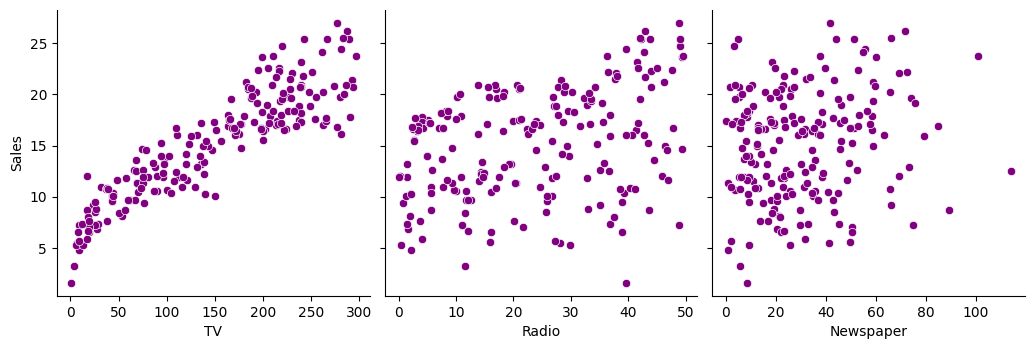

In [ ]:
pairplot = sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=3.5, aspect=1, kind='scatter')

for cl in pairplot.axes.flatten():
    for artist in cl.collections:
        artist.set_facecolor('purple')

plt.show()

We can see that as the advertising cost for TV increases, there is a gradual increase in the sales.
Whereas for Radio and Newspaper, the plot is very scattered, thus no direct conclusion can be inferred

<Axes: xlabel='TV', ylabel='Frequency'>

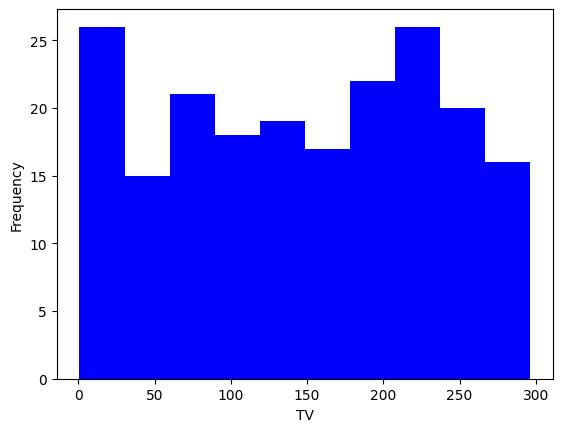

In [ ]:
data['TV'].plot.hist(bins=10,color='blue',xlabel='TV',ylabel='Frequency')

<Axes: xlabel='Radio', ylabel='Frequency'>

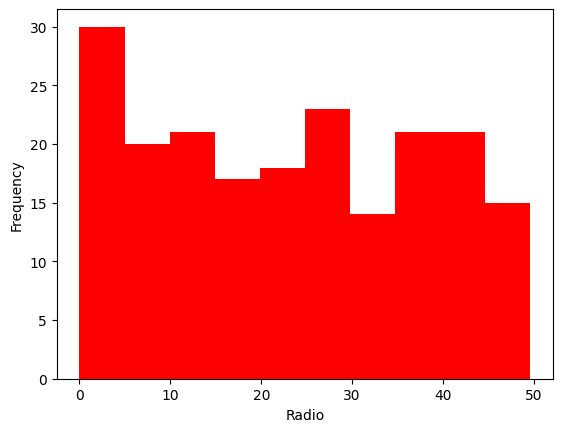

In [ ]:
data['Radio'].plot.hist(bins=10,color='red',xlabel='Radio',ylabel='Frequency')

<Axes: xlabel='Newspaper', ylabel='Frequency'>

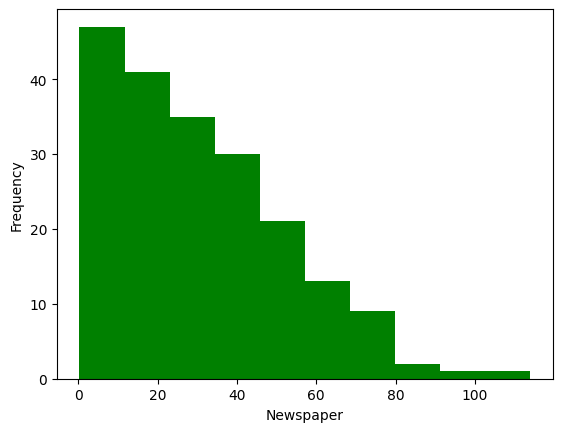

In [ ]:
data['Newspaper'].plot.hist(bins=10,color='green',xlabel='Newspaper',ylabel='Frequency')

Sales is seen to be increased when the cost of the newspaper is reduced

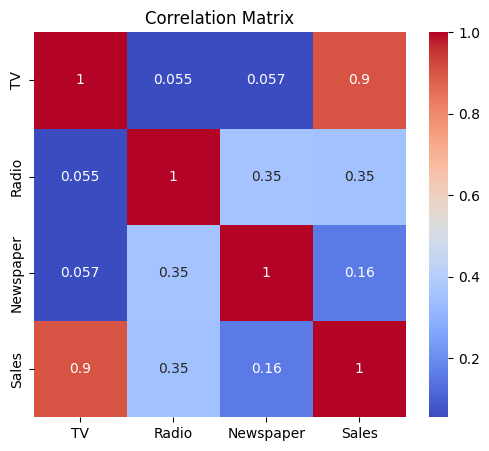

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


We can see that Sales is highly correlated with the TV.



## Prediction

 *   Based off on the TV factor, we will train our Linear-Regression model



In [ ]:
from sklearn.model_selection import train_test_split
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [ ]:
print(X_train)

        TV  Radio  Newspaper
131  265.2    2.9       43.0
96   197.6    3.5        5.9
181  218.5    5.4       27.4
19   147.3   23.9       19.1
153  171.3   39.7       37.7
..     ...    ...        ...
67   139.3   14.5       10.2
192   17.2    4.1       31.6
117   76.4    0.8       14.8
47   239.9   41.5       18.5
172   19.6   20.1       17.0

[140 rows x 3 columns]


In [ ]:
print(y_train)

131    17.7
96     16.7
181    17.2
19     14.6
153    16.0
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 140, dtype: float64


In [ ]:
print(X_test)

        TV  Radio  Newspaper
18    69.2   20.5       18.3
170   50.0   11.6       18.4
107   90.4    0.3       23.2
98   289.7   42.3       51.2
177  170.2    7.8       35.2
182   56.2    5.7       29.7
5      8.7   48.9       75.0
146  240.1    7.3        8.7
12    23.8   35.1       65.9
152  197.6   23.3       14.2
61   261.3   42.7       54.7
125   87.2   11.8       25.9
180  156.6    2.6        8.3
154  187.8   21.1        9.5
80    76.4   26.7       22.3
7    120.2   19.6       11.6
33   265.6   20.0        0.3
130    0.7   39.6        8.7
37    74.7   49.4       45.7
74   213.4   24.6       13.1
183  287.6   43.0       71.8
145  140.3    1.9        9.0
45   175.1   22.5       31.5
159  131.7   18.4       34.6
60    53.5    2.0       21.4
123  123.1   34.6       12.4
179  165.6   10.0       17.6
185  205.0   45.1       19.6
122  224.0    2.4       15.6
44    25.1   25.7       43.3
16    67.8   36.6      114.0
55   198.9   49.4       60.0
150  280.7   13.9       37.0
111  241.7   3

In [ ]:
print(y_test)

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
182     8.7
5       7.2
146    18.2
12      9.2
152    16.6
61     24.2
125    10.6
180    15.5
154    20.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     16.1
159    12.9
60      8.1
123    15.2
179    17.6
185    22.6
122    16.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      17.9
83     13.6
106     7.2
134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
63     14.0
8       4.8
75      8.7
118    15.9
143    10.4
71     12.4
124    19.7
184    17.6
97     20.5
149    10.1
24      9.7
30     21.4
160    16.4
40     16.6
56      5.5
Name: Sales, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.05365017, 0.11073062, 0.00203697])

In [ ]:
result = model.predict(X_test)
print(result)

[10.68909303  8.67371102  9.59969914 24.99989846 14.73590568  8.37604918
 10.70350416 18.37670708  9.9670026  17.87946837 23.52765543 10.70692059
 13.37566958 17.10051561 11.77005197 13.31194616 21.13395461  9.10945664
 14.24009701 18.86885012 25.00670623 12.42508633 16.61899482 13.84289673
  7.80458355 15.13012055 14.69687153 20.70140682 16.9844145   8.94984434
 12.59168427 20.93257626 21.34337227 21.89151357  7.23908022  7.06001103
  9.28335812 15.6840471  13.33894748  7.28903633 11.05676585  9.08768206
 15.60592891 18.21716827 18.9560652  13.47385617  5.36520991 10.59696871
 15.66036131 10.98229096 12.20805533 20.70970272 20.70533061 16.95931925
  9.96622132  9.44413497 23.60505449 15.99066008 18.06706692  8.25675464]


We can see that the results and the y_test values are very close to each other. The following explains why this difference occurs

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(y_test, result)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1.3662313868452758


In [ ]:
# Mean Squared Error
mse = mean_squared_error(y_test, result)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.9380152204802865


In [ ]:
#Root Mean Squared Error
rmse = mean_squared_error(y_test, result, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1.9844433024100956


In [ ]:
# R-squared
r2 = r2_score(y_test, result)
print(f'R-squared: {r2}')

R-squared: 0.8692052734910128


In [ ]:
model.coef_

array([0.05365017, 0.11073062, 0.00203697])

In [ ]:
model.intercept_

4.669247212392522

In [ ]:
69.2*0.05473199+7.143822253515246

10.931275961515247

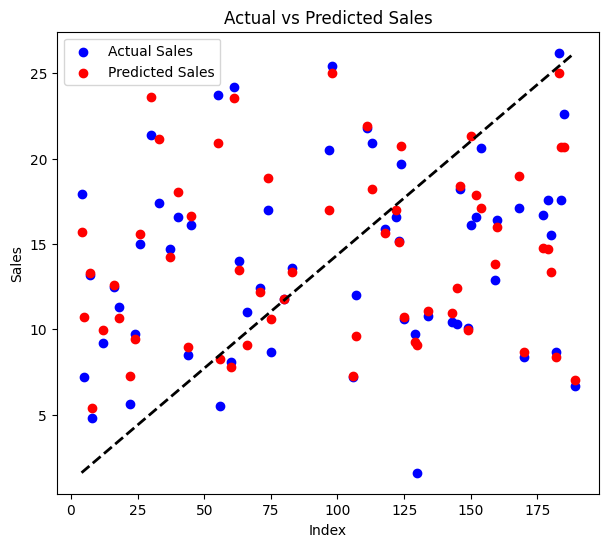

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(X_test.index, y_test, color='blue', label='Actual Sales')
plt.scatter(X_test.index, result, color='red', label='Predicted Sales')
plt.plot([min(X_test.index), max(X_test.index)], [min(y_test), max(y_test)], color='black', lw=2, linestyle='--')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()
